In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import charset_normalizer
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,6)

In [2]:
with open("C:\\Users\\DELL\\Downloads\\zomato.csv",'rb') as rawdata:
    result= charset_normalizer.detect(rawdata.read(10000))
print(result)

{'encoding': 'cp775', 'language': 'English', 'confidence': 0.9956}


In [3]:
zomato_df= pd.read_csv("C:\\Users\\DELL\\Downloads\\zomato.csv",encoding="latin-1") # 'iso8859_10' can also be used intead of latin-1 !!
zomato_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
country_df= pd.read_excel("C:\\Users\\DELL\\Downloads\\Country-Code (1).xlsx")
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [6]:
country_df.nunique()

Country Code    15
Country         15
dtype: int64

In [7]:
zomato_df.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Average Cost for two     140
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                   1012
dtype: int64

In [8]:
a= np.sort(zomato_df['Country Code'].unique())

In [9]:
b= np.sort(country_df['Country Code'].unique())

In [10]:
(a==b).sum() 

15

In [11]:
df= zomato_df.merge(country_df,on='Country Code')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [12]:
df.shape

(9551, 22)

In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [15]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [16]:
(df.isnull().sum()/(len(df)))*100

Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating color            0.000000
Rating text             0.000000
Votes                   0.000000
Country                 0.000000
dtype: float64

In [17]:
df[df['Cuisines'].isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,No,No,1,3.4,Orange,Average,34,United States
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,No,No,1,3.4,Orange,Average,36,United States
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,No,No,1,3.9,Yellow,Good,160,United States
288,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,No,No,3,3.9,Yellow,Good,209,United States
312,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,No,No,3,3.8,Yellow,Good,102,United States
328,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,No,No,1,3.4,Orange,Average,11,United States
349,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,No,No,3,4.4,Green,Very Good,1158,United States
395,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,No,No,1,4.7,Dark Green,Excellent,707,United States
432,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,No,No,1,3.9,Yellow,Good,309,United States


In [18]:
df1= df.fillna('Unknown')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [20]:
df1.drop('Switch to order menu',axis=1,inplace=True)
df1.drop('Locality Verbose',axis=1,inplace=True)
df1.drop('Address',axis=1,inplace=True)
df1.drop('Restaurant ID',axis=1,inplace=True)
df1

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,"Century City Mall, Poblacion, Makati City",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,"Little Tokyo, Legaspi Village, Makati City",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, Ortigas, Mandaluyong City",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,"SM Megamall, Ortigas, Mandaluyong City",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,NamlÛ± Gurme,208,ÛÁstanbul,Karakí_y,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz AÛôacÛ±,208,ÛÁstanbul,Koôuyolu,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,ÛÁstanbul,Kuruí_eôme,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,Aôôk Kahve,208,ÛÁstanbul,Kuruí_eôme,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [21]:
df1['Restaurant Name'].unique()

array(['Le Petit Souffle', 'Izakaya Kikufuji', 'Heat - Edsa Shangri-La',
       ..., 'Huqqa', 'A\x81ô\x81ôk Kahve', "Walter's Coffee Roastery"],
      dtype=object)

In [22]:
df1['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Athens', 'Augusta', 'Boise', 'Cedar Rapids/Iowa City',
       'Clatskanie', 'Cochrane', 'Columbus', 'Dalton', 'Davenport',
       'Des Moines', 'Dubuque', 'Fernley', 'Gainesville', 'Lakeview',
       'Lincoln', 'Macon', 'Mc Millan', 'Miller', 'Monroe',
       'Ojo Caliente', 'Orlando', 'Pensacola', 'Pocatello', 'Potrero',
       'Princeton', 'Rest of Hawaii', 'Savannah', 'Sioux City',
       'Tampa Bay', 'Valdosta', 'Vernonia', 'Waterloo', 'Weirton',
       'Winchester Bay', 'Armidale', 'Balingup', 'Beechworth',
       'Dicky Beach', 'East Ballina', 'Flaxton', 'Forrest',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lorn', 'Macedon', 'Mayfield', 'Middleton Beach', 'Montville',
       'Palm Cove', 'Paynesville', 'Penola', 'Phillip Isl

In [23]:
df1['Cuisines'].sample(10)

7964                  North Indian, Chinese, Bakery
2150                          North Indian, Chinese
5809                                        Mughlai
4088         Asian, Japanese, Korean, Thai, Chinese
1351                                   North Indian
8422    Italian, Continental, North Indian, Chinese
7179                                   North Indian
6319                                        Chinese
1282                                           Cafe
8677                                   North Indian
Name: Cuisines, dtype: object

In [24]:
df1['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [25]:
df1['Country'].unique()

array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)

In [26]:
df1['Rating text'].unique()

array(['Excellent', 'Very Good', 'Good', 'Average', 'Not rated', 'Poor'],
      dtype=object)

In [27]:
df1['Rating color'].unique()

array(['Dark Green', 'Green', 'Yellow', 'Orange', 'White', 'Red'],
      dtype=object)

In [28]:
df1[['Has Table booking','Has Online delivery','Is delivering now']].sample(5)

,Has Table booking,Has Online delivery,Is delivering now
4719,Yes,No,No
6090,No,No,No
2417,Yes,No,No
602,No,Yes,No
4433,No,Yes,No


In [29]:
df1['Locality'].unique()

array(['Century City Mall, Poblacion, Makati City',
       'Little Tokyo, Legaspi Village, Makati City',
       'Edsa Shangri-La, Ortigas, Mandaluyong City', ..., 'Ko\x81ôuyolu',
       'Kuruí_e\x81ôme', 'Moda'], dtype=object)

In [30]:
df1.duplicated().sum()

0

In [32]:
def edit_non_ascii(series):
    # Define a mapping of non-ASCII characters to their edited versions
    char_mapping = {
        'é':'e',
        'ô':'o',
        '±':'i',
        'í':'i',
        'Û':'',   #As ÛÁ is to be converted into I
        'Á':'I',  
        '£':'e',
        'ç':'c',
        '':'',
        'Ç':'c',
        'ì':'i',
        'Â':'a',
        'ä':'',
        'ó':'',
        '»':'',
        'ñ':''
    }
    edited_series= []   # Creating an empty list for new series array
    for string in series:
        edited_string = ""   # Creating an empty string so as to use for appending edited strings
        for char in string:
            if ord(char) > 127 and char in char_mapping:     
            # ord(ascii)<128 and ord(non-ascii)>128
            # Replace the non-ASCII character with its edited version
                edited_string += char_mapping[char]  # Assessing values through dict char_mapping
            else:
                edited_string += char
        edited_series.append(edited_string)
    return edited_series

In [33]:
import string

def remove_punctuation(series):
    edited_series=[]
    # Create a translation table that maps each punctuation character to None
    translator = str.maketrans('', '', string.punctuation)
    # Use translate() method to remove punctuation from the input string
    for x in series:
        x=x.translate(translator)
        edited_series.append(x)
    return edited_series

In [34]:
def special_characters(df, column_name):
    special_char_indices = []
    for index, row in df.iterrows():
        if any(ord(char) > 127 for char in str(row[column_name])):
            special_char_indices.append(index)
    return special_char_indices

In [35]:
special_characters(df1, 'City')

[22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 9537,
 9538,
 9539,
 9540,
 9541,
 9542,
 9543,
 9544,
 9545,
 9546,
 9547,
 9548,
 9549,
 9550]

In [36]:
df1['City']= remove_punctuation(df1['City'])
df1['City']= edit_non_ascii(df1['City'])
df1['City']= df1['City'].replace({'Sieo':'Sao','Cedar RapidsIowa City':'Cedar Rapids','ChathamKent':'Chatham Kent'})
df1['City']

0            Makati City
1            Makati City
2       Mandaluyong City
3       Mandaluyong City
4       Mandaluyong City
              ...       
9546            Istanbul
9547            Istanbul
9548            Istanbul
9549            Istanbul
9550            Istanbul
Name: City, Length: 9551, dtype: object

In [37]:
special_characters(df1, 'City')

[]

In [38]:
special_characters(df1, 'Locality')

[32,
 33,
 34,
 35,
 37,
 38,
 48,
 64,
 65,
 75,
 76,
 77,
 81,
 9517,
 9520,
 9521,
 9524,
 9525,
 9526,
 9527,
 9528,
 9529,
 9530,
 9531,
 9532,
 9533,
 9535,
 9536,
 9537,
 9539,
 9541,
 9542,
 9543,
 9544,
 9545,
 9546,
 9547,
 9548,
 9549]

In [39]:
df1['Locality']= remove_punctuation(df1['Locality'])
df1['Locality']= edit_non_ascii(df1['Locality'])
df1['Locality']=df1['Locality'].replace({"Ko\x81ouyolu":"Muhittin",'Kuruie\x81ome':'Muallim Naci Caddesi','iguas Claras':'Aguas Claras','Gazi Osman Paoa':'Gazi Osman Paoa','Beoiktao Merkez':'Merkez','Emirgi¢n':'Emirgan'})
df1['Locality']

0        Century City Mall Poblacion Makati City
1       Little Tokyo Legaspi Village Makati City
2        Edsa ShangriLa Ortigas Mandaluyong City
3           SM Megamall Ortigas Mandaluyong City
4           SM Megamall Ortigas Mandaluyong City
                          ...                   
9546                                     Karakiy
9547                                    Muhittin
9548                        Muallim Naci Caddesi
9549                        Muallim Naci Caddesi
9550                                        Moda
Name: Locality, Length: 9551, dtype: object

In [40]:
special_characters(df1, 'Locality')

[]

In [41]:
df1['Currency'].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(\x8c£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [42]:
df1['Currency']=df1['Currency'].replace({'Botswana Pula(P)':'Botswana Pula(BWP)','Pounds(\x8c£)':'Pounds(£)'})
df1['Currency'].unique()

array(['Botswana Pula(BWP)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(£)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [43]:
special_characters(df1, 'Cuisines')

[9530, 9544]

In [44]:
df1['Cuisines']= df1['Cuisines'].replace({'Kebab, Turkish Pizza, Dí_ner':'Kebab, Turkish Pizza','Desserts, Bí_rek':'Desserts'})

In [45]:
special_characters(df1, 'Cuisines')

[]

In [46]:
special_characters(df1, 'Restaurant Name')

[23,
 26,
 30,
 36,
 38,
 48,
 51,
 52,
 59,
 76,
 77,
 79,
 331,
 335,
 342,
 652,
 960,
 1038,
 1512,
 1521,
 1560,
 1585,
 1644,
 1676,
 1807,
 1870,
 2000,
 2018,
 2127,
 2281,
 2293,
 2308,
 2317,
 2321,
 2421,
 2529,
 2575,
 2821,
 3024,
 3231,
 3668,
 3672,
 3723,
 3770,
 4167,
 4209,
 4280,
 4302,
 4691,
 5006,
 5241,
 5578,
 5935,
 6431,
 6506,
 6677,
 6692,
 6701,
 6702,
 6931,
 6989,
 7006,
 7007,
 7027,
 7042,
 7084,
 7178,
 7195,
 7197,
 7448,
 7516,
 7725,
 7865,
 8034,
 8219,
 8247,
 8260,
 8514,
 8551,
 8552,
 8692,
 8737,
 8748,
 9047,
 9099,
 9163,
 9233,
 9308,
 9453,
 9518,
 9519,
 9522,
 9523,
 9529,
 9530,
 9532,
 9534,
 9535,
 9536,
 9541,
 9542,
 9543,
 9544,
 9546,
 9547,
 9549]

In [47]:
replacements = {
    'Cafí©': 'Cafe',
    'íæ': 'a',
    'Filí©': 'File',
    'bui©no': 'bueno',
    '77I03': '', 
    'Appi©tit': 'Appetit',
    'Pi¢tisserie': 'Patisserie',
    'Theyöö«': 'Theos',
    'Sauti©ed': 'Sauteed',
    'Masabaoi Kebapiisi': 'MASABASI KEBAPCISI',
    'Sitio': 'Sutis',
    'KBC': 'Khansama Food',
    'Westi©ross': 'Westeross',
    'Chawlas': 'Chawlas',
    'NESCAFi': 'NESCAFE',
    'Aook': '',
    'LaBonti©': 'LaBonte',
    'öLava': '', 
    'Rosarti©': 'Rosarte',
    'Caffi©': 'Caffe',
    'Eden Noodles Cafe ÎÎ¢': 'Eden Noodles Cafe',
    'Meohur': 'Meshur',
    'Masabaoi': 'MASABASI'
}

df1['Restaurant Name'] = df1['Restaurant Name'].replace(replacements, regex=True)
df1['Restaurant Name']= remove_punctuation(df1['Restaurant Name'])
df1['Restaurant Name']= edit_non_ascii(df1['Restaurant Name'])

In [48]:
special_characters(df1,'Restaurant Name')

[1521,
 1560,
 1807,
 1870,
 2000,
 2018,
 2529,
 2575,
 3723,
 3770,
 4209,
 4280,
 5241,
 5578,
 6931,
 6989,
 8247,
 8260,
 8551,
 8748,
 9163,
 9308,
 9519,
 9522,
 9529,
 9532,
 9541,
 9549]

In [49]:
df1[['Average Cost for two','Price range','Aggregate rating','Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000
mean,1199.210763,1.804837,2.666370,156.909748
std,16121.183073,0.905609,1.516378,430.169145
min,0.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


<Axes: ylabel='Aggregate rating'>

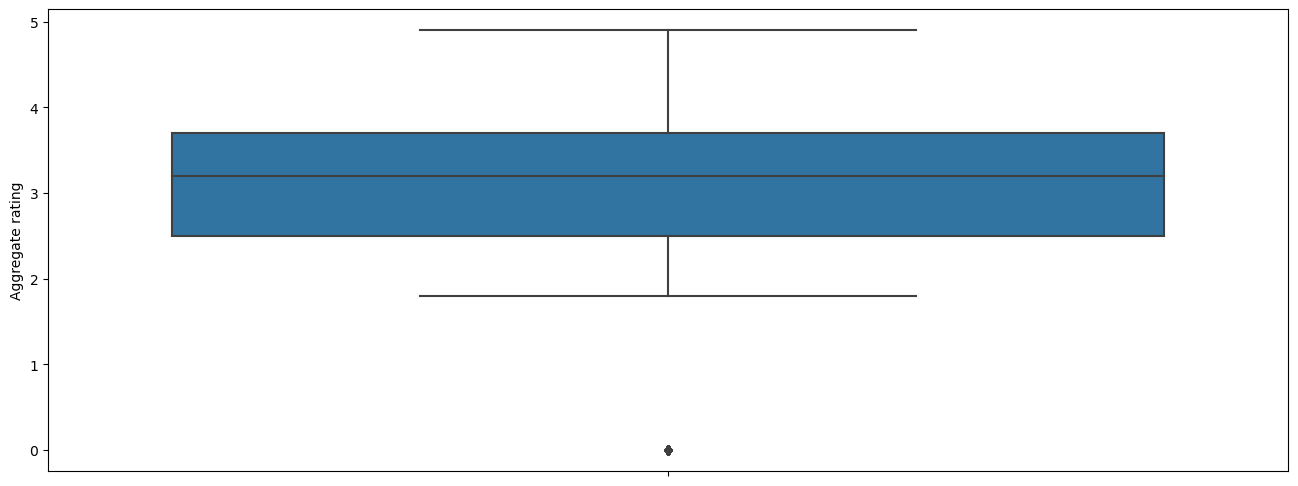

In [50]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df1,y='Aggregate rating')

<Axes: ylabel='Price range'>

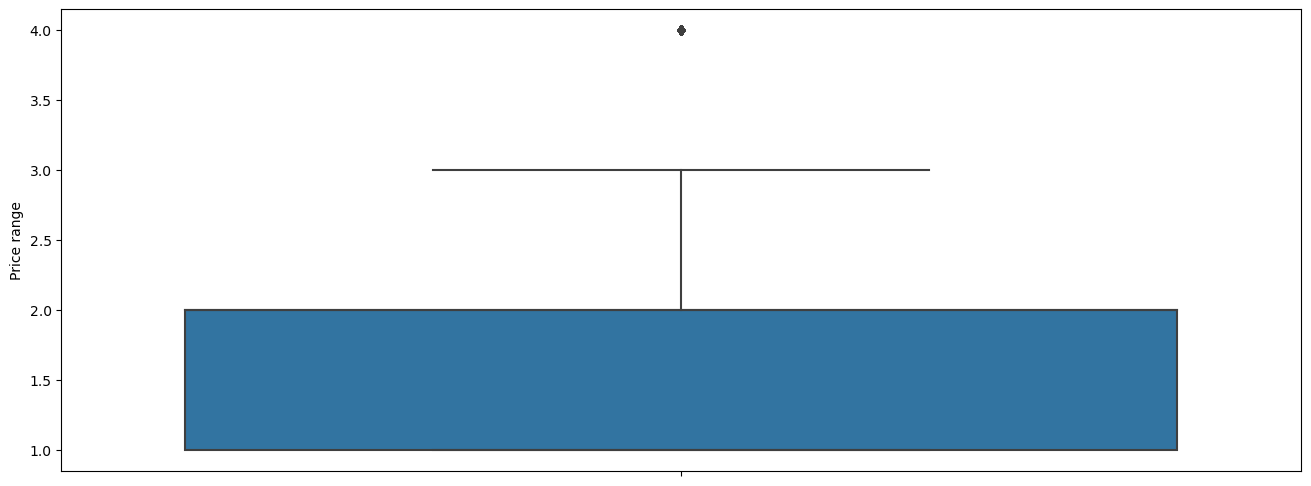

In [51]:
plt.figure(figsize=(16,6))
sns.boxplot(data=df1,y='Price range')

In [52]:
df1.loc[df1['Average Cost for two']==0]

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
84,Cookie Shoppe,216,Albany,Albany,-84.154000,31.577200,Unknown,0,Dollar($),No,No,No,1,3.4,Orange,Average,34,United States
85,El Vaquero Mexican Restaurant,216,Albany,Albany,-84.219400,31.615800,Mexican,0,Dollar($),No,No,No,1,3.4,Orange,Average,45,United States
87,Pearlys Famous Country Cookng,216,Albany,Albany,-84.175900,31.588200,Unknown,0,Dollar($),No,No,No,1,3.4,Orange,Average,36,United States
197,Deorios,216,Columbus,Columbus,-84.942700,32.481000,"Italian, Pizza",0,Dollar($),No,No,No,1,4.0,Green,Very Good,170,United States
235,Azteca,216,Davenport,Davenport,-90.568300,41.569900,Mexican,0,Dollar($),No,No,No,1,4.3,Green,Very Good,167,United States
271,Happy Joes Pizza Ice Cream,216,Dubuque,Dubuque,-90.726400,42.495500,"Desserts, Pizza, Ice Cream",0,Dollar($),No,No,No,1,3.5,Yellow,Good,74,United States
328,HI Lite Bar Lounge,216,Miller,Miller,-98.989100,44.515800,Unknown,0,Dollar($),No,No,No,1,3.4,Orange,Average,11,United States
374,Royal Hotel,216,Pocatello,Lava Hot Springs,-112.012700,42.619200,"Pizza, Bar Food",0,Dollar($),No,No,No,1,3.6,Yellow,Good,59,United States
384,Senor Iguanas,216,Pocatello,Pocatello,-112.443300,42.894200,Mexican,0,Dollar($),No,No,No,1,3.6,Yellow,Good,108,United States
634,The Latitude Radisson Blu,1,Agra,Radisson Blu Tajganj,78.057044,27.163303,"North Indian, Chinese, Continental",0,Indian Rupees(Rs.),No,No,No,1,3.9,Yellow,Good,103,India


In [53]:
df1= df1.drop(df1[df1['Average Cost for two']==0].index)
df1

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,Le Petit Souffle,162,Makati City,Century City Mall Poblacion Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(BWP),Yes,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,Izakaya Kikufuji,162,Makati City,Little Tokyo Legaspi Village Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(BWP),Yes,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,Heat Edsa ShangriLa,162,Mandaluyong City,Edsa ShangriLa Ortigas Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(BWP),Yes,No,No,4,4.4,Green,Very Good,270,Phillipines
3,Ooma,162,Mandaluyong City,SM Megamall Ortigas Mandaluyong City,121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(BWP),No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,Sambo Kojin,162,Mandaluyong City,SM Megamall Ortigas Mandaluyong City,121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(BWP),Yes,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,Namli Gurme,208,Istanbul,Karakiy,28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,Ceviz Aoaci,208,Istanbul,Muhittin,29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,Huqqa,208,Istanbul,Muallim Naci Caddesi,29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,Aook Kahve,208,Istanbul,Muallim Naci Caddesi,29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,4,4.0,Green,Very Good,901,Turkey


In [54]:
df1[['Average Cost for two','Price range','Aggregate rating','Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9533.000000,9533.000000,9533.000000,9533.000000
mean,1201.475087,1.806357,2.664303,157.054757
std,16136.313015,0.905787,1.516960,430.557984
min,7.000000,1.000000,0.000000,0.000000
25%,250.000000,1.000000,2.500000,5.000000
50%,400.000000,2.000000,3.200000,31.000000
75%,700.000000,2.000000,3.700000,131.000000
max,800000.000000,4.000000,4.900000,10934.000000


In [55]:
df1.loc[df1['Average Cost for two']==800000]

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9283,Skye,94,Jakarta,Grand Indonesia Mall Thamrin,106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,No,3,4.1,Green,Very Good,1498,Indonesia
9284,Satoo Hotel ShangriLa,94,Jakarta,Hotel ShangriLa Sudirman,106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,No,3,4.6,Dark Green,Excellent,873,Indonesia


In [56]:
df1.loc[df1['Votes']==10934]

,Restaurant Name,Country Code,City,Locality,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
728,Toit,1,Bangalore,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",2000,Indian Rupees(Rs.),No,No,No,4,4.8,Dark Green,Excellent,10934,India


In [57]:
cat_cols=df1.select_dtypes(include=['object']).columns
num_cols=df1.drop(['Country Code','Longitude','Latitude'],axis=1).select_dtypes(include=np.number).columns

In [58]:
cat_cols

Index(['Restaurant Name', 'City', 'Locality', 'Cuisines', 'Currency',
       'Has Table booking', 'Has Online delivery', 'Is delivering now',
       'Rating color', 'Rating text', 'Country'],
      dtype='object')

In [59]:
num_cols

Index(['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'], dtype='object')

Skew:  -0.95
Mean:  2.66


Text(0, 0.5, '')

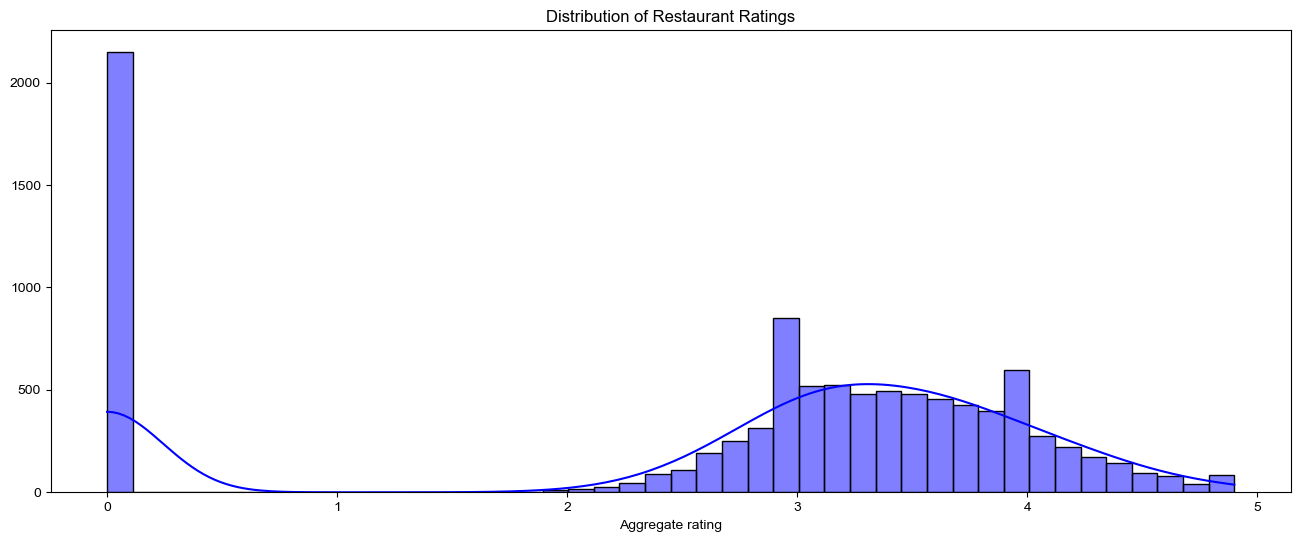

In [60]:
print('Skew: ',round(df1[num_cols[2]].skew(),2))
print('Mean: ',round(df1[num_cols[2]].mean(),2))
plt.figure(figsize=(16,6))
sns.histplot(data=df1,x=num_cols[2],kde=True,color='blue')
sns.set_style('white')
plt.title('Distribution of Restaurant Ratings')
plt.ylabel('')

Skew:  0.89
Mean:  1.81


Text(0, 0.5, '')

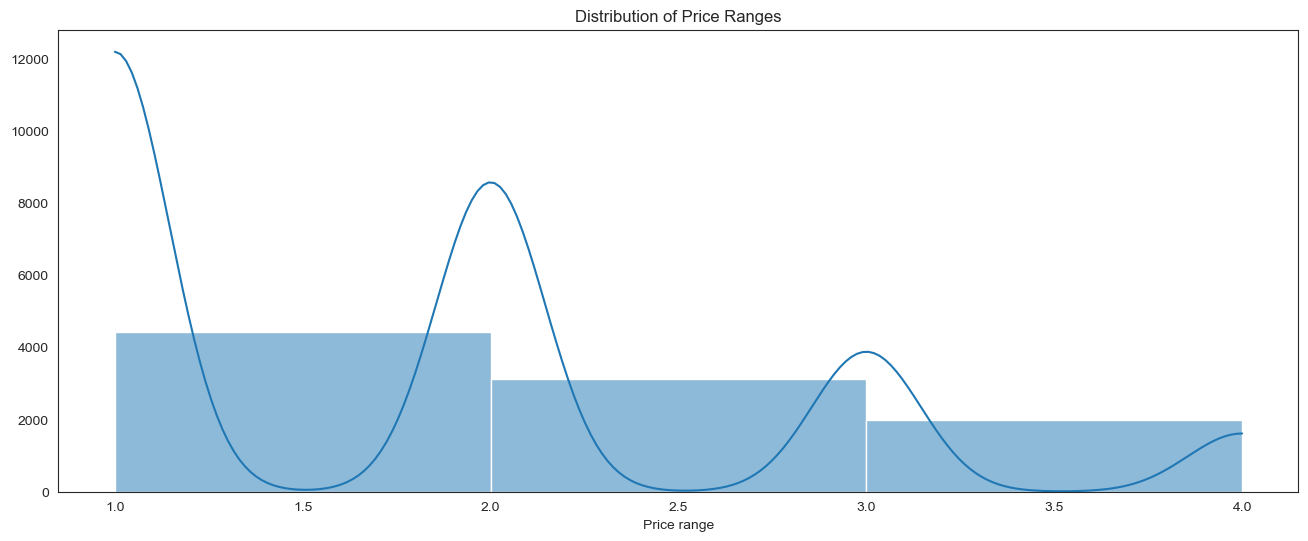

In [61]:
print('Skew: ',round(df1[num_cols[1]].skew(),2))
print('Mean: ',round(df1[num_cols[1]].mean(),2))
plt.figure(figsize=(16,6))
sns.histplot(data=df1,x=num_cols[1],bins=4,binwidth=1,kde=True)
sns.set_style('dark')
plt.title('Distribution of Price Ranges')
plt.ylabel('')

Skew:  8.8
Mean:  157.05


C:\Users\DELL\AppData\Local\Temp\ipykernel_44676\3049444884.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1,x=num_cols[3],shade=True)


Text(0.5, 1.0, 'Distribution of Votes')

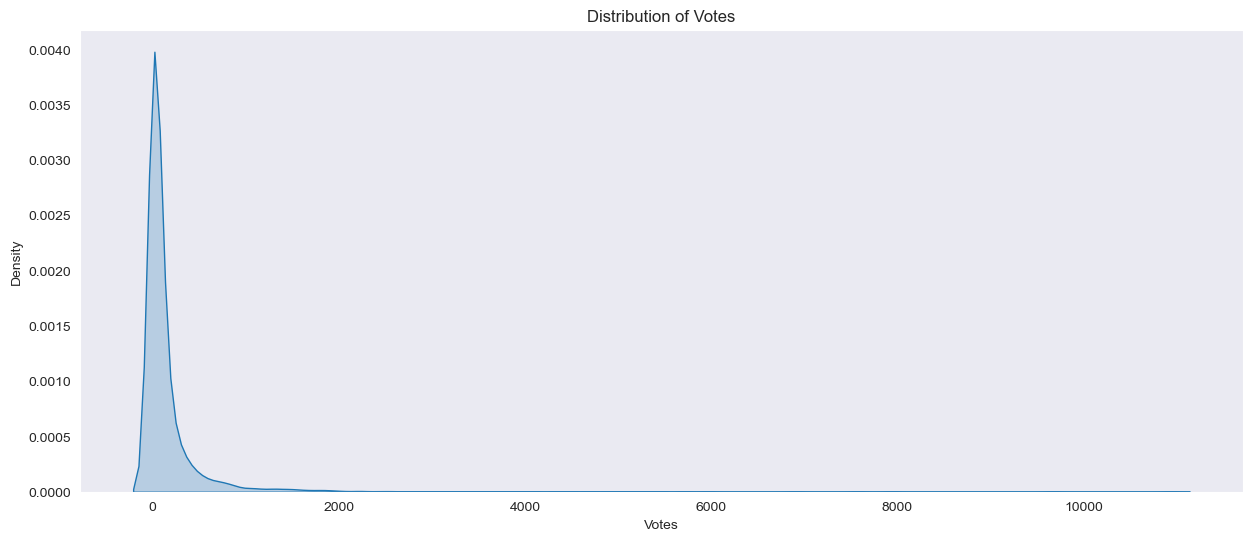

In [62]:
print('Skew: ',round(df1[num_cols[3]].skew(),2))
print('Mean: ',round(df1[num_cols[3]].mean(),2))
plt.figure(figsize=(15,6))
sns.kdeplot(data=df1,x=num_cols[3],shade=True)
sns.set_style('darkgrid')
plt.title('Distribution of Votes')    

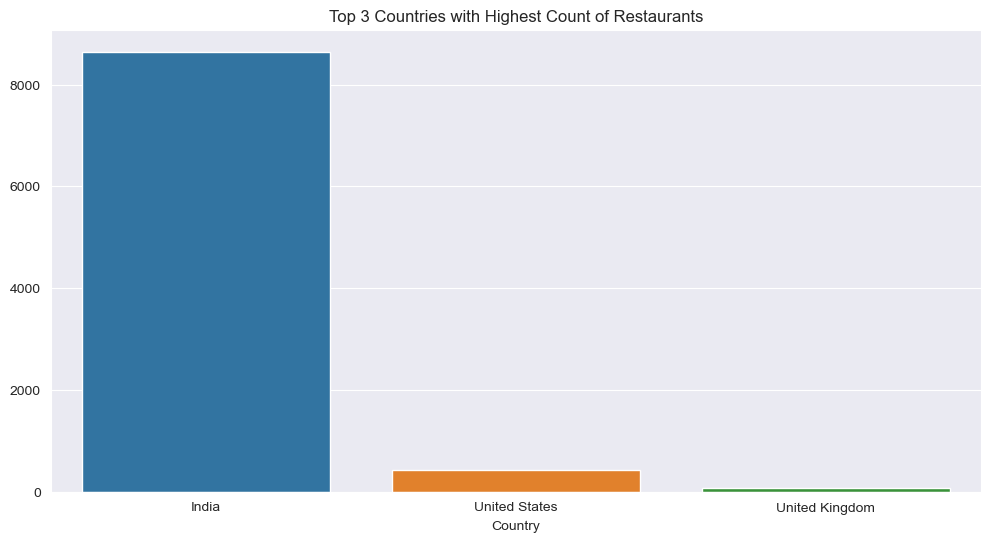

In [63]:
countries= df1.groupby('Country').size().sort_values(ascending=False)
sns.barplot(data=df1,x=countries.index[:3],y=countries.values[:3])
plt.title('Top 3 Countries with Highest Count of Restaurants')
sns.set_style('white')

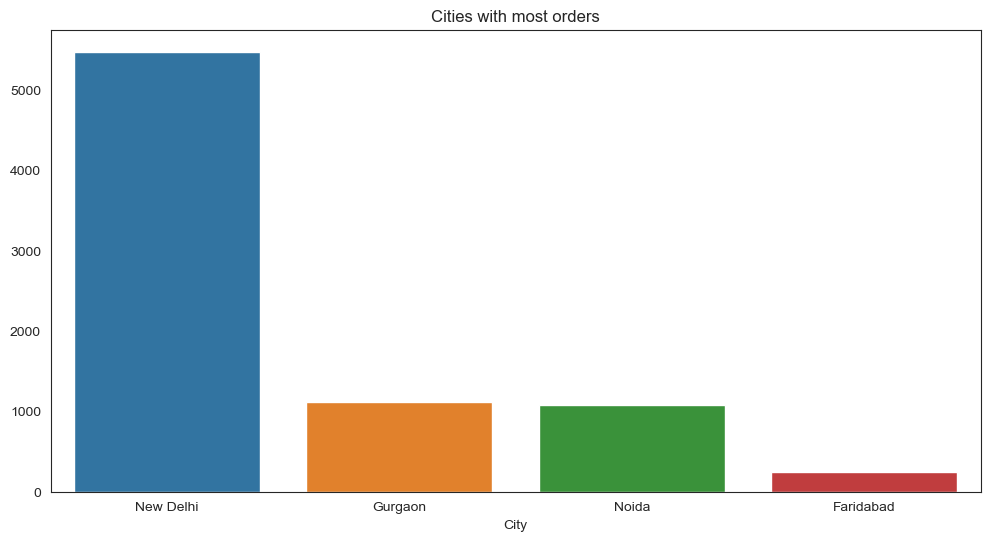

In [64]:
cities= df1.groupby('City').size().sort_values(ascending=False)
sns.barplot(data=df1,x=cities.index[:4],y=cities.values[:4])
plt.title('Cities with most orders')
sns.set_style('white')

Text(0.5, 1.0, 'Top 10 Cuisines Ordered')

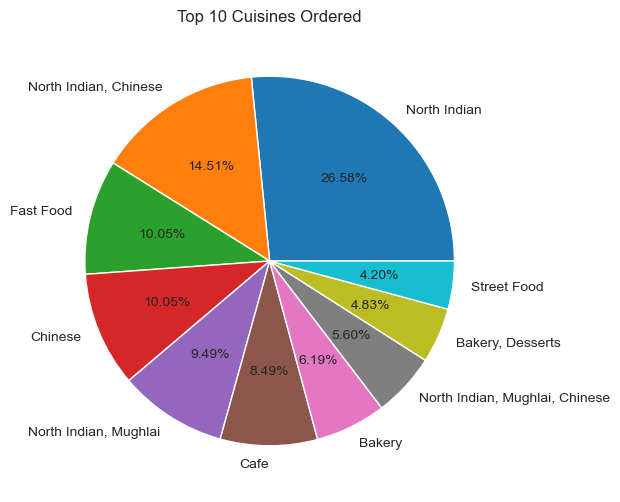

In [65]:
cuisines_values= df1[cat_cols[3]].value_counts().values
cuisines_index= df1[cat_cols[3]].value_counts().index
plt.pie(cuisines_values[:10],labels=cuisines_index[:10],autopct="%1.2f%%",radius=1)
plt.title('Top 10 Cuisines Ordered')

Text(0.5, 1.0, 'Ratings given')

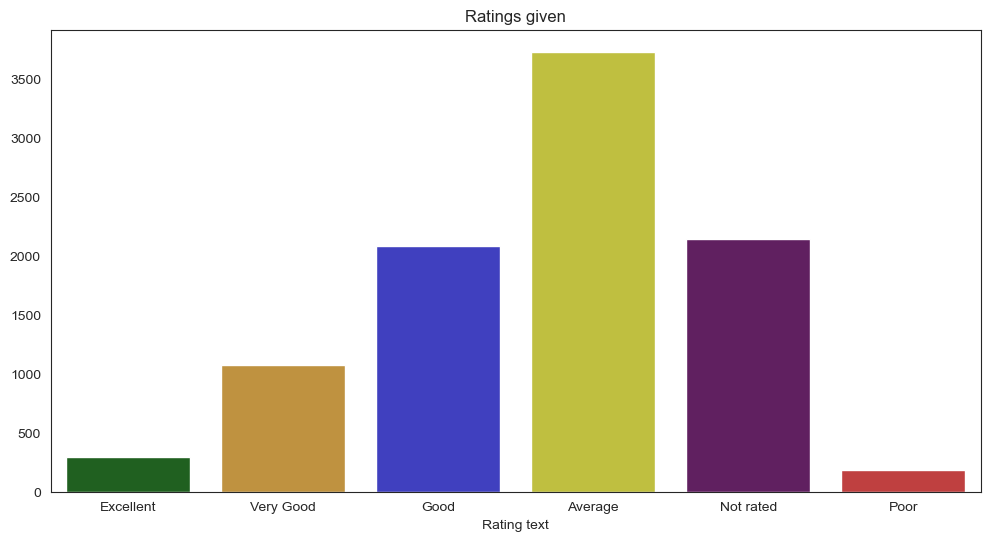

In [66]:
sns.countplot(data=df1,x=cat_cols[9],palette=['green','orange','blue','yellow','purple','red'],saturation=0.5)
plt.ylabel('')
plt.title('Ratings given')

Text(0, 0.5, '')

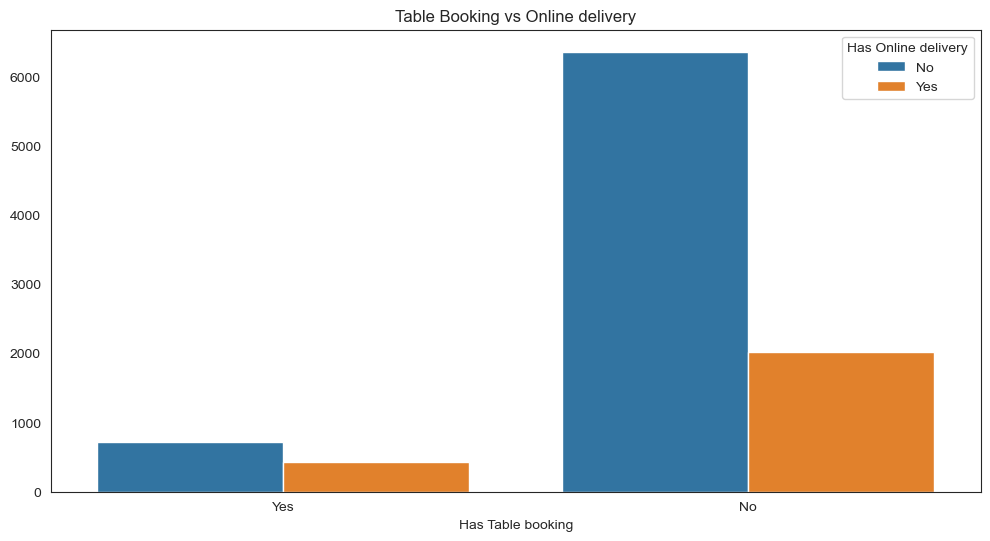

In [67]:
sns.countplot(data=df1,x=cat_cols[5],hue=cat_cols[6])
sns.set_style('white')
plt.title('Table Booking vs Online delivery')
plt.ylabel('')

Text(0.5, 1.0, 'Countries v/s Ratings')

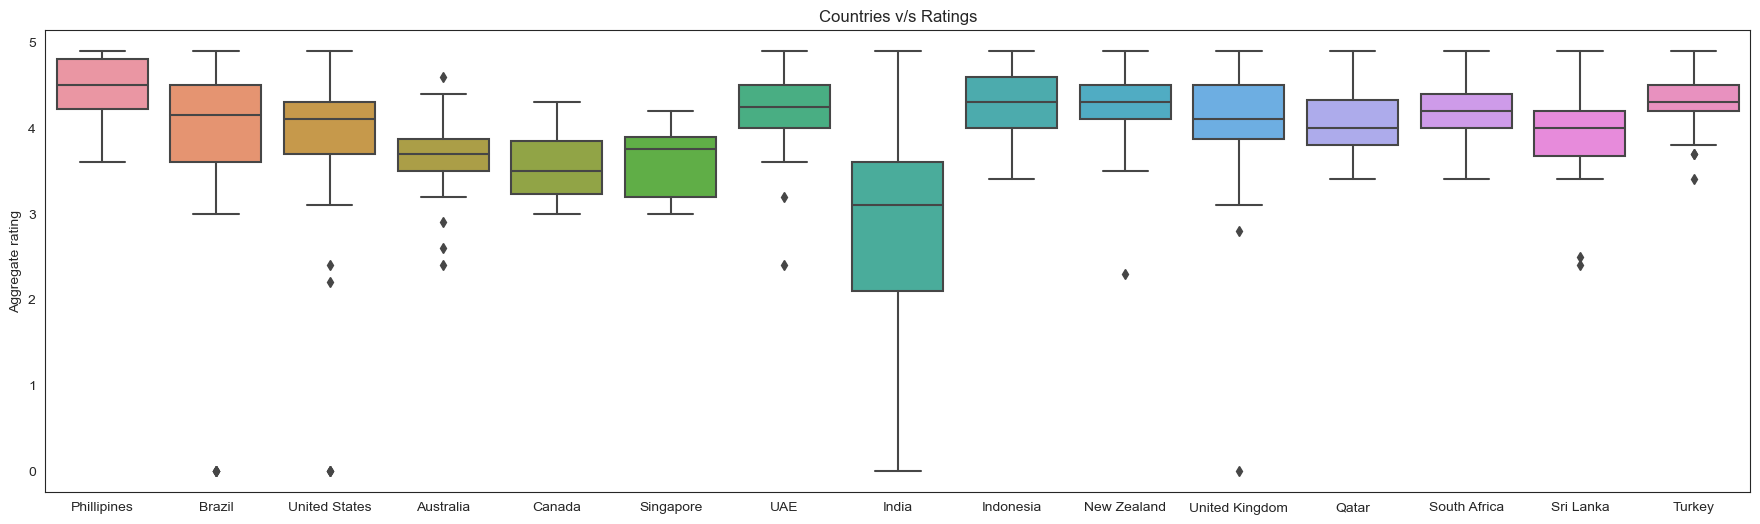

In [68]:
plt.figure(figsize=(22,6))
sns.boxplot(data=df1,x=cat_cols[10],y=num_cols[2])
sns.set_style('white')
plt.xlabel('')
plt.title('Countries v/s Ratings')

In [69]:
df1['Average Cost for two'].sort_values(ascending=False).unique()

array([800000, 500000, 450000, 350000, 300000, 250000, 200000, 165000,
       150000, 120000, 100000,  70000,   8000,   7000,   6500,   6000,
         5500,   5100,   5000,   4800,   4700,   4500,   4400,   4300,
         4200,   4100,   4000,   3800,   3700,   3650,   3600,   3500,
         3300,   3210,   3200,   3000,   2900,   2800,   2700,   2650,
         2600,   2500,   2400,   2350,   2300,   2200,   2100,   2000,
         1950,   1900,   1850,   1800,   1750,   1700,   1650,   1600,
         1550,   1540,   1500,   1450,   1400,   1350,   1300,   1250,
         1200,   1150,   1100,   1050,   1000,    955,    950,    900,
          850,    800,    750,    720,    700,    650,    600,    570,
          550,    545,    535,    515,    500,    450,    445,    430,
          410,    400,    390,    360,    350,    330,    320,    315,
          300,    294,    290,    285,    280,    270,    260,    250,
          240,    230,    220,    200,    190,    180,    170,    160,
      

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Peranakan, Indonesian'),
  Text(1, 0, 'Western, Asian, Cafe'),
  Text(2, 0, 'Cafe, Western'),
  Text(3, 0, 'Indonesian'),
  Text(4, 0, 'French, Western'),
  Text(5, 0, 'Japanese'),
  Text(6, 0, 'Sushi, Japanese'),
  Text(7, 0, 'Italian, Continental'),
  Text(8, 0, 'Asian, Indonesian, Western')])

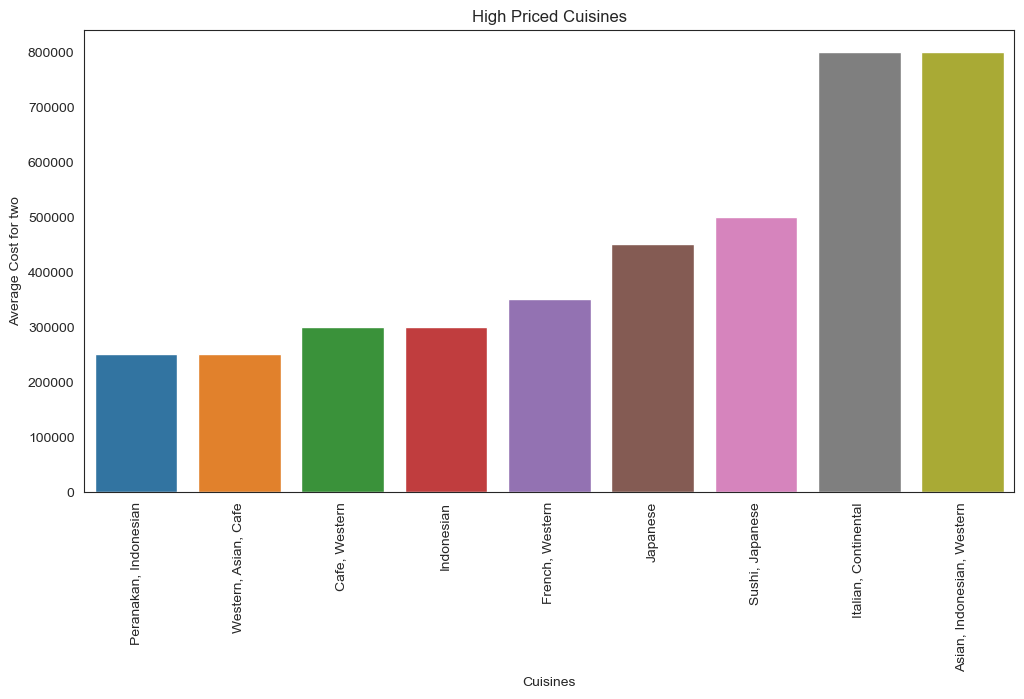

In [70]:
plt.title('High Priced Cuisines')
costlyrest=df1[df1['Average Cost for two']>200000]
costlyrest=costlyrest.sort_values(by='Average Cost for two')
sns.barplot(data=costlyrest,x="Cuisines",y="Average Cost for two")
plt.xticks(rotation=90)

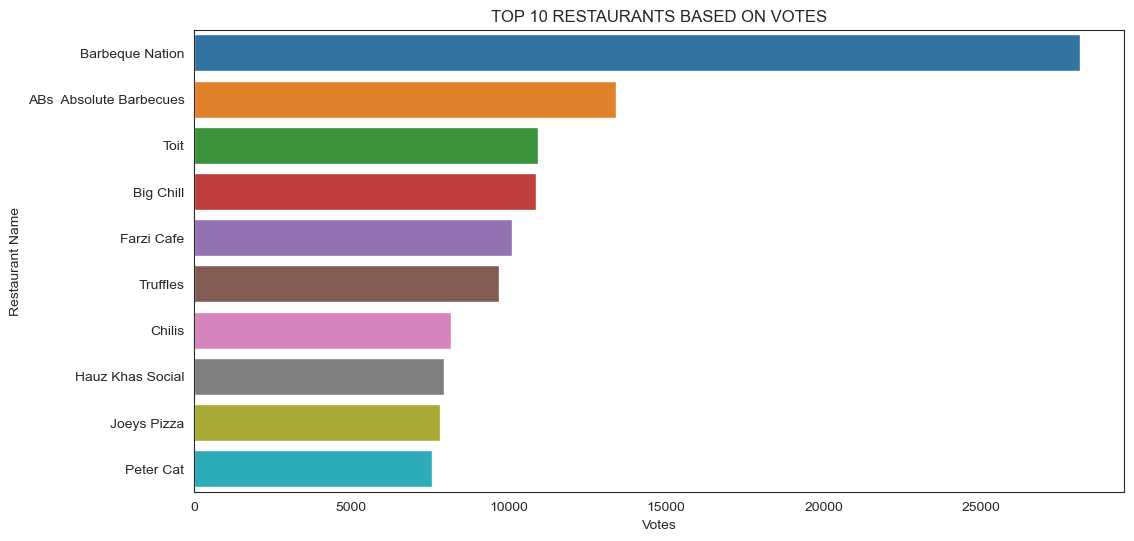

In [71]:
votes=df1.groupby("Restaurant Name")["Votes"].sum().reset_index()
votes=votes.sort_values(by="Votes",ascending=False)
sns.barplot(x="Votes",y="Restaurant Name",data=votes[:10])
plt.title("TOP 10 RESTAURANTS BASED ON VOTES")
sns.set_style('white')